In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('C:/Users/Omar/OneDrive/Vs Code/ML_Proj/loan_eligibility_project/data/loan-train.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# 🧾 Info about columns and types
df.info()

# 🧮 Summary stats (numeric + categorical)
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


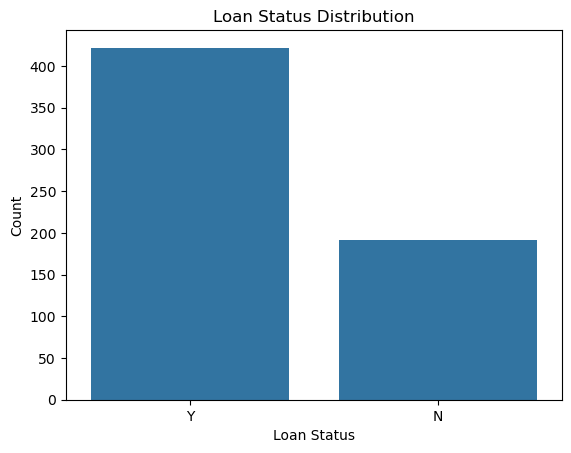

Class distribution (normalized):
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [17]:
# Target: Loan_Status
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Class balance ratio
print("Class distribution (normalized):")
print(df['Loan_Status'].value_counts(normalize=True))


In [18]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from both if it's included
categorical_cols = [col for col in categorical_cols if col not in ['Loan_ID', 'Loan_Status']]
numerical_cols = [col for col in numerical_cols if col not in ['Loan_ID', 'Loan_Status']]

print("Categorical features:", categorical_cols)
print("Numerical features:", numerical_cols)


Categorical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Numerical features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [19]:
# Analyze categorical features: show category counts and percentages
for col in categorical_cols:
    print(f"\n Feature: {col}")
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(dropna=False, normalize=True) * 100
    report = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(report)



 Feature: Gender
        Count  Percentage
Gender                   
Male      489       79.64
Female    112       18.24
NaN        13        2.12

 Feature: Married
         Count  Percentage
Married                   
Yes        398       64.82
No         213       34.69
NaN          3        0.49

 Feature: Dependents
            Count  Percentage
Dependents                   
0             345       56.19
1             102       16.61
2             101       16.45
3+             51        8.31
NaN            15        2.44

 Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82

 Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               500       81.43
Yes               82       13.36
NaN               32        5.21

 Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urb

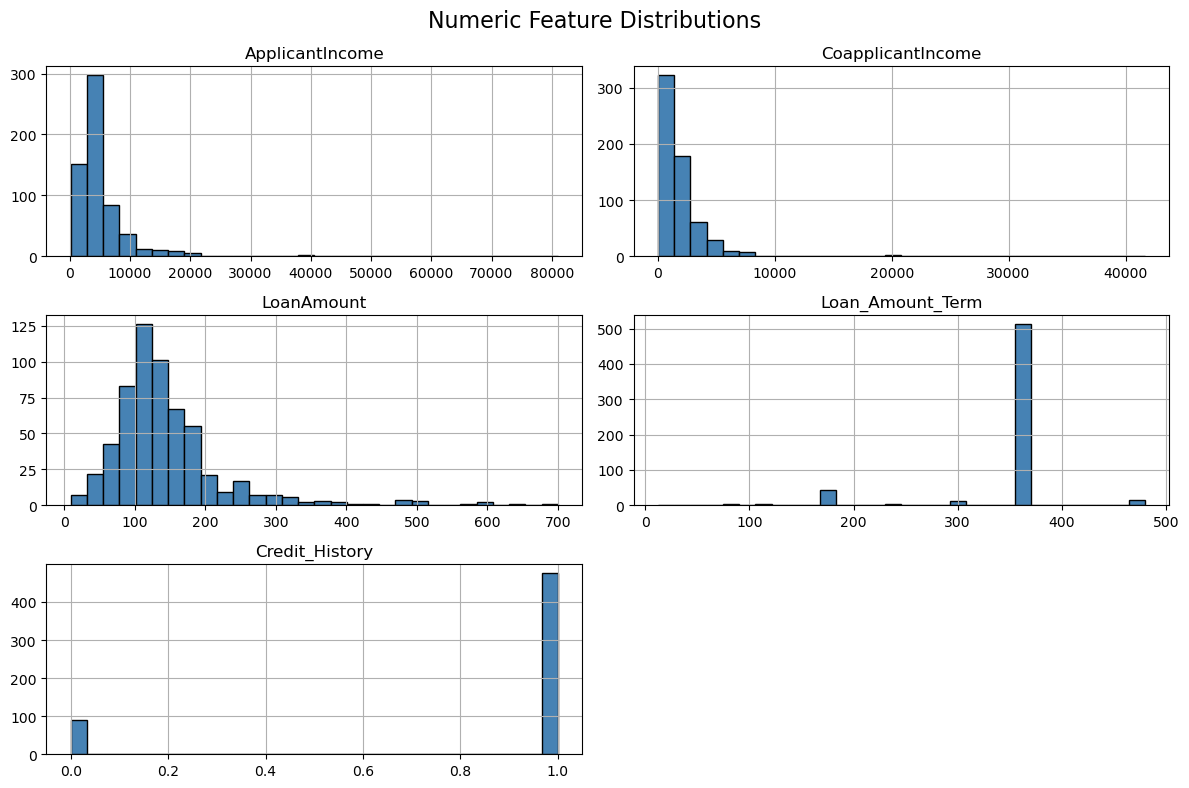

In [20]:
# Plot histograms for numeric features
import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(12, 8), bins=30 , color='steelblue', edgecolor='black')
plt.suptitle('Numeric Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


In [13]:
print("\nMissing values in numerical features:")
print(df[numerical_cols].isnull().sum())


Missing values in numerical features:
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64
